In [1]:
import geopandas as gpd
import numpy as np
import rasterio
from rasterio import features
from shapely.geometry import shape
from shapely.geometry import Polygon
from shapely.ops import triangulate
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from joblib import Parallel, delayed

In [2]:
# Open the raster file
with rasterio.open("ThuanHoa/KetQua/PNN.tif") as src:
    # Read the raster data as a numpy array
    raster_data = src.read(1)

    # Convert the data type to an acceptable type, e.g., int32
    raster_data = raster_data.astype(np.int32)

    # Define a mask for the areas of interest (e.g., non-ero values)
    mask = raster_data > 0

    # Generate shapes (polygons) from the raster data
    shapes = list(features.shapes(raster_data, mask=mask, transform=src.transform))

    # Convert shapes into geometries (Shapely geometries)
    geoms = [shape(geom) for geom, value in shapes]

    # Create a GeoDataFrame from the geometries
    gdf = gpd.GeoDataFrame(geometry=geoms, crs=src.crs)

    # Save the result as a shapefile or any other vector format
    gdf.to_file("resultRemoveOfTranThaiDuy/output_vector.shp")

/tmp/ipykernel_105/2546670063.py:7: RuntimeWarning: invalid value encountered in cast
  raster_data = raster_data.astype(np.int32)


Axes(0.125,0.179879;0.775x0.630241)


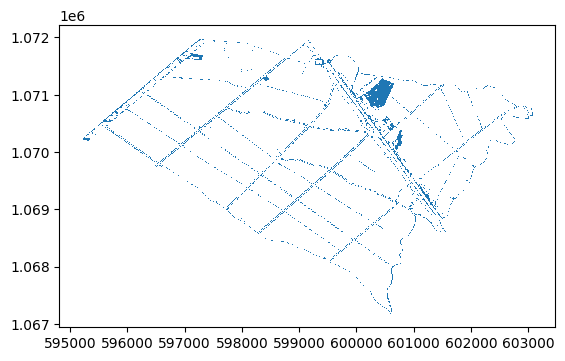

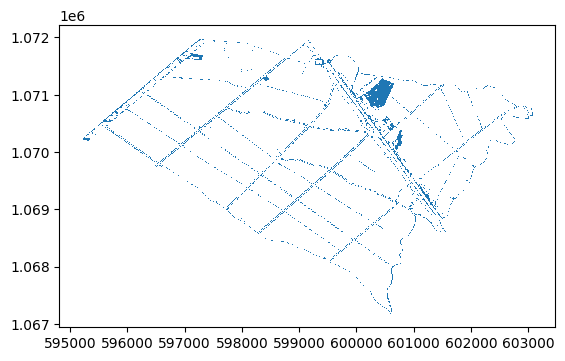

In [26]:
# Load the shapefile
gdf = gpd.read_file("resultRemoveOfTranThaiDuy/output_vector.shp")
    
# Plot the data
gdf.plot()

# Show the plot
plt.show()

FID                                                      1446
area                                                  27300.0
geometry    POLYGON ((600460 1071210, 600480 1071210, 6004...
Name: 1446, dtype: object


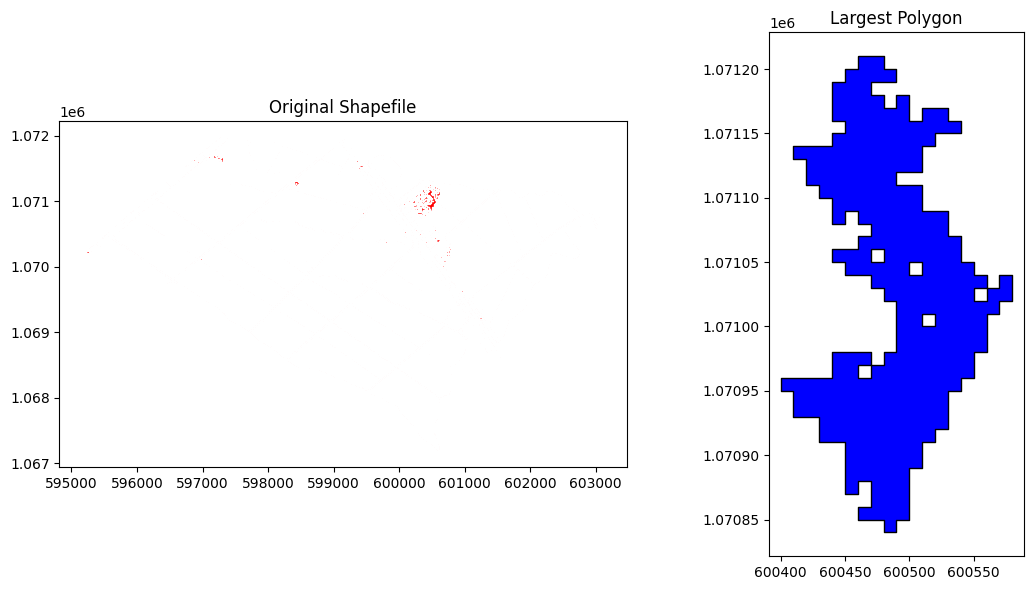

In [35]:
# Step 2: Ensure the shapefile has a CRS in meters (not degrees), convert if necessary
if gdf.crs.is_geographic:
    # Reproject to a projected CRS that uses meters (e.g., UTM zone suitable for your region)
    gdf = gdf.to_crs(epsg=32633)  # Adjust the EPSG code based on your region

# Step 3: Handle multipolygons and explode them into single polygons if necessary
gdf = gdf.explode(ignore_index=True)

# Step 4: Calculate the area for each polygon
gdf['area'] = gdf['geometry'].area

# Step 5: Identify the largest polygon by area
largest_polygon = gdf.loc[gdf['area'].idxmax()]

# Step 6: Create a new GeoDataFrame with only the largest polygon
gdf_largest = gpd.GeoDataFrame([largest_polygon], columns=gdf.columns, crs=gdf.crs)

# Step 7: Plot the original and the filtered shapefile (largest polygon)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot original shapefile
gdf.plot(ax=ax1, color='red', edgecolor='white')
ax1.set_title('Original Shapefile')

# Plot largest polygon only
gdf_largest.plot(ax=ax2, color='blue', edgecolor='black')
ax2.set_title('Largest Polygon')

plt.tight_layout()
plt.show()

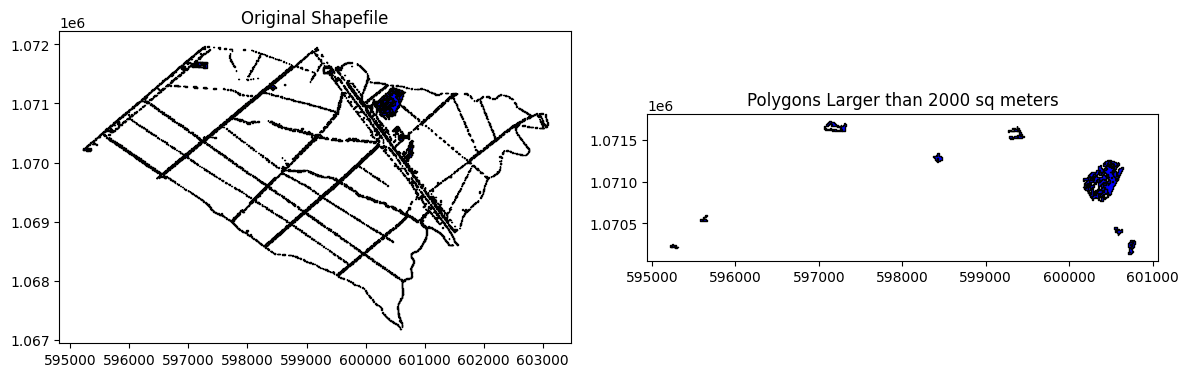

In [56]:
# Step 2: Ensure the shapefile has a CRS in meters (not degrees), convert if necessary
if gdf.crs.is_geographic:
    # Reproject to a projected CRS that uses meters (e.g., UTM zone suitable for your region)
    gdf = gdf.to_crs(epsg=32633)  # Adjust the EPSG code based on your region

# Step 3: Handle multipolygons and explode them into single polygons if necessary
gdf = gdf.explode(ignore_index=True)

# Step 4: Calculate the area for each polygon
gdf['area'] = gdf['geometry'].area

# Step 5: Set the threshold value (for example, 1500 square meters)
area_threshold = 2000  # Adjust this value based on your requirements

# Step 6: Filter the polygons with an area greater than the threshold
gdf_large_areas = gdf[gdf['area'] > area_threshold]

# Check if any polygons meet the criteria
if gdf_large_areas.empty:
    print(f"No polygons found with area larger than {area_threshold} square meters.")
else:
    # Step 7: Plot the original and the filtered shapefile
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot original shapefile
    gdf.plot(ax=ax1, color='blue', edgecolor='black')
    ax1.set_title('Original Shapefile')

    # Plot filtered shapefile (only polygons larger than threshold)
    gdf_large_areas.plot(ax=ax2, color='blue', edgecolor='black')
    ax2.set_title(f'Polygons Larger than {area_threshold} sq meters')

    plt.tight_layout()
    plt.show()